In [2]:
import os
import numpy as np
import matplotlib.pyplot as plt
import pickle as pk
from tqdm import tqdm

In [3]:
class Cov:
    
    def __init__(self,case):
        dire = 'Cov'
        self.GS = pk.load(open(os.path.join(dire,f"GS_{case}.pkl"),'rb'))
        self.RS = pk.load(open(os.path.join(dire,f"RS_{case}.pkl"),'rb'))
        
        self.nsamp = len(self.GS['lensed'])
        self.nell = len(self.GS['lensed'][0])
        self.bias = self.calculate_bias()
        self.lensed,self.delensed = self.calculate_spectra_mean()
        _,self.debiased_delensed = self.calculate_spectra_mean_debiased()
        self.cov_lensed, self.cov_delensed = self.calculate_variance()
        
    def calculate_bias(self):
        bias = np.zeros(self.nell)
        for i in tqdm(range(self.nsamp),desc='Calculating Bias',unit='simulation'):
            bias += (self.GS['delensed'][i] -self.GS['lensed'][i])    
        bias/=self.nsamp
        return bias
    
    def calculate_spectra_mean(self):
        lensed,delensed = np.zeros(self.nell),np.zeros(self.nell)
        for i in tqdm(range(self.nsamp),desc='Calculating Mean CMB spectra',unit='simulation'):
            lensed += self.RS['lensed'][i]
            delensed += self.RS['delensed'][i]
        lensed/=self.nsamp
        delensed/=self.nsamp
        return lensed,delensed
    
    def calculate_spectra_mean_debiased(self):
        lensed,delensed = np.zeros(self.nell),np.zeros(self.nell)
        for i in tqdm(range(self.nsamp),desc='Calculating Mean debiased CMB spectra',unit='simulation'):
            lensed += self.RS['lensed'][i]
            #delensed += (self.RS['delensed'][i] - self.bias)
            delensed += self.RS['delensed'][i]
        lensed/=self.nsamp
        delensed/=self.nsamp
        return lensed,delensed
    
    def calculate_variance(self):
        lensed,delensed = np.zeros(self.nell),np.zeros(self.nell)
        for i in tqdm(range(self.nsamp),desc='Calculating Mean CMB spectra',unit='simulation'):
            lensed += (self.RS['lensed'][i])**2
            #delensed += (self.RS['delensed'][i]-self.bias)**2
            delensed += (self.RS['delensed'][i])**2
        lensed/=self.nsamp
        delensed/=self.nsamp
        lensed -= (self.lensed)**2
        delensed -= (self.debiased_delensed)**2
        return lensed,delensed

In [4]:
cov_lb =  Cov('LB')
cov_cmbs4 = Cov('CMBS4')
cov_s4plb = Cov('CMBS4_LB')

Calculating Mean CMB spectra: 100%|██████████| 100/100 [00:00<00:00, 120008.70simulation/s]


(2.58358409297568e-07, 2e-05)

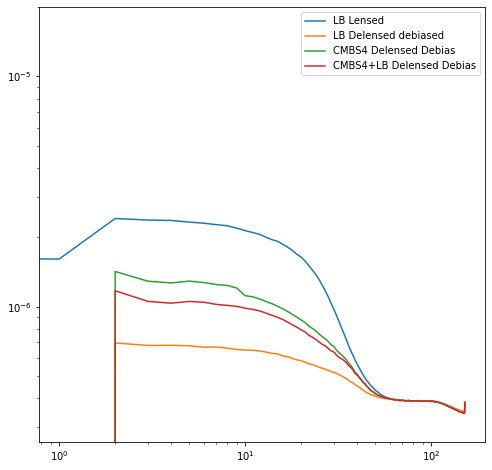

In [5]:
plt.figure(figsize=(8,8))
plt.loglog(cov_lb.lensed, label='LB Lensed')
plt.loglog(cov_lb.debiased_delensed, label='LB Delensed debiased')
plt.loglog(cov_cmbs4.debiased_delensed, label='CMBS4 Delensed Debias')
plt.loglog(cov_s4plb.debiased_delensed, label='CMBS4+LB Delensed Debias')
plt.legend()
plt.ylim(None,2*10e-6)

(2.9455786573524817e-18, 2e-10)

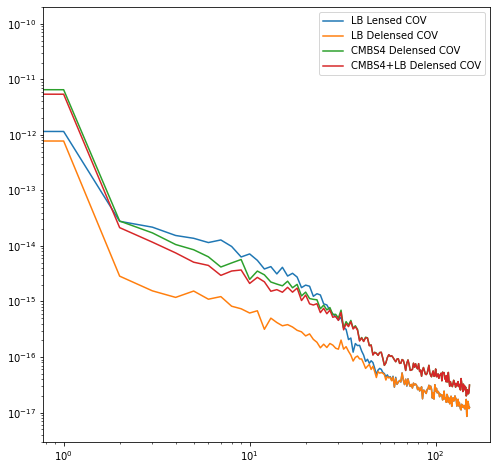

In [6]:
plt.figure(figsize=(8,8))
plt.loglog(cov_lb.cov_lensed, label='LB Lensed COV')
plt.loglog(cov_lb.cov_delensed, label='LB Delensed COV')
plt.loglog(cov_cmbs4.cov_delensed, label='CMBS4 Delensed COV')
plt.loglog(cov_s4plb.cov_delensed, label='CMBS4+LB Delensed COV')
plt.legend()
plt.ylim(None,2*10e-11)